# Introduction to machine learning

*Maxime Sangnier*

Fall, 2022

## Practical session 7: Principal component analysis

# Table of contents
1. [Principal component analysis](#part1)
1. [Kernel principal component analysis](#part2)
    - [An illustrative example](#part2sec1)
    - [The preimage problem](#part2sec2)
1. [Manifold learning](#part3)


In [1]:
from mllab import *

# Principal component analysis <a id="part1"></a>
>Load [this dataset](https://perso.lpsm.paris/~msangnier/files/pythonM2/defra_consumption.csv) in a dataframe and display it.

In [3]:
# Answer
from pandas import read_csv

X = read_csv("https://perso.lpsm.paris/~msangnier/files/pythonM2/defra_consumption.csv",
             delimiter=";", index_col=0)
X

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209
Sugars,156,175,147,139
Fresh potatoes,720,874,566,1033
Fresh Veg,253,265,171,143
Other Veg,488,570,418,355
Processed potatoes,198,203,220,187


>Make sure that countries correspond to rows of the data matrix and center the columns.
Now, extract the row labels and the column labels.

In [4]:
# Answer
X = X.T
X -= X.mean(axis=0)

food = X.columns
print(food)

countries = X.index
print(countries)

Index(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype='object')
Index(['England', 'Wales', 'Scotland', 'N Ireland'], dtype='object')


>Apply [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) with two components and scatter the result with the help of the `scatter` function.
What can you conclude?

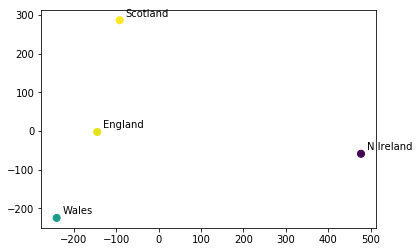

In [5]:
# Answer
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y = pca.fit_transform(X)

scatter(Y, countries)

>Plot on the same figure:
- the eigenvalues of the second order matrix $X^\top X$;
- the eigenvalues of the Gram matrix $X X^\top$;
- the singular values of $X$.

>Are they similar?

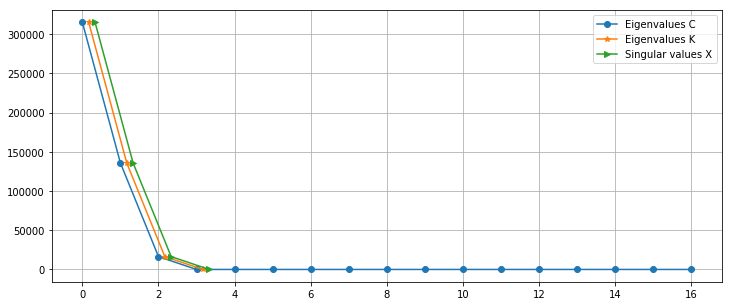

In [6]:
# Answer
C = X.T.dot(X)  # Second order moment matrix
K = X.dot(X.T)  # Gram matrix

# Eigenvalues
evc = np.flipud(np.linalg.eigvalsh(C))
evk = np.flipud(np.linalg.eigvalsh(K))

# Singular values
svx = np.linalg.svd(X, compute_uv=False)

# Figure
plt.figure(figsize=(12, 5))
plt.plot(evc, '-o', label="Eigenvalues C")
plt.plot(np.arange(evk.size)+1/6, evk, '-*', label="Eigenvalues K")
plt.plot(np.arange(svx.size)+2/6, svx**2, '->', label="Singular values X")
plt.legend()

>Define a function `pca2(X, n_components=2)`, that returns the PCA of $X$ based on the second order moment matrix.
Scatter the result and compare it to the return of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

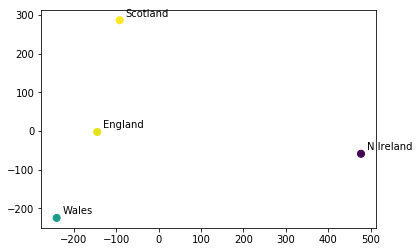

In [7]:
# Answer
def pca2(X, n_components=2):
    C = X.T.dot(X)
    ev, V = np.linalg.eigh(C)
    U = np.fliplr(V[:, -n_components:])
    return np.asarray(X.dot(U))

scatter(pca2(X), countries)

>Define a function `pcaK(X, n_components=2)`, that returns the PCA of $X$ based on the Gram matrix.
Scatter the result and compare it to the return of `pca2`.

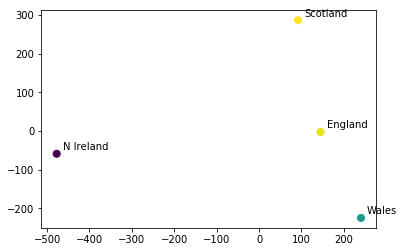

In [8]:
# Answer
def pcaK(X, n_components=2):
    K = X.dot(X.T)
    ev, V = np.linalg.eigh(K)
    return np.fliplr((V * np.sqrt(ev))[:, -n_components:])

scatter(pcaK(X), countries)

>Since good things come in threes, do the same with SVD.

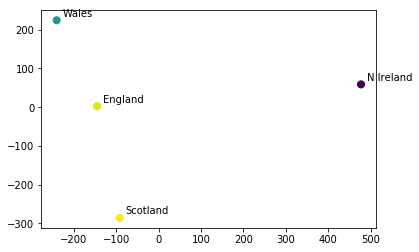

In [9]:
# Answer
def pcaS(X, n_components=2):
    U, sv, _ = np.linalg.svd(X, full_matrices=False)
    return (U * sv)[:, :n_components]

scatter(pcaS(X), countries)b

>Generate different multivariate random matrices $Z$ with shape (100, 500), (500, 100) and (500, 500), and compare the CPU time of each of the 4 methods at hand. You can use `time.clock` for measuring the elapsed time.

In [10]:
# Answer
from time import clock

for shape in [(100, 500), (500, 100), (500, 500)]:
    Z = np.random.randn(*shape)
    print("Shape:", Z.shape)

    for method, pca_fun in [("sklearn", pca.fit_transform),
                    ("Second order", pca2),
                    ("Gram", pcaK),
                    ("SVD", pcaS)]:
        t = clock()
        pca_fun(Z)
        print("   {0} time: {1:0.2f}".format(method, clock()-t))

Shape: (100, 500)
   sklearn time: 0.10
   Second order time: 0.26
   Gram time: 0.03
   SVD time: 0.07
Shape: (500, 100)
   sklearn time: 0.10
   Second order time: 0.02
   Gram time: 0.27
   SVD time: 0.05
Shape: (500, 500)
   sklearn time: 0.62
   Second order time: 0.25
   Gram time: 0.23
   SVD time: 0.39


>Plot the curve of the ratio of explained variance versus the number of components.
How much variance is explained with 2 components?

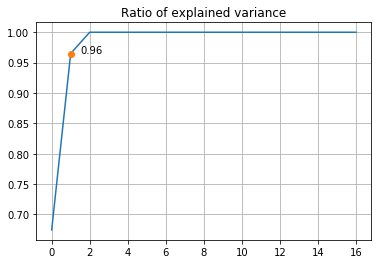

In [11]:
# Answer
C = X.T.dot(X)
ev = np.linalg.eigvalsh(C)
r = np.flipud(ev).cumsum() / ev.sum()

plt.plot(r)
plt.title("Ratio of explained variance")

plt.plot(1, r[1], 'o')
plt.annotate("{0:0.2f}".format(r[1]), xy=(1, r[1]), xytext=np.r_[1, r[1]]+np.r_[0.5, 0])

>Recover the result with scikit-learn.

In [ ]:
# Answer
pca2 = PCA().fit(X)
r = pca2.explained_variance_ratio_.cumsum()

plt.plot(r)
plt.title("Ratio of explained variance")

plt.plot(1, r[1], 'o')
plt.annotate("{0:0.2f}".format(r[1]), xy=(1, r[1]), xytext=np.r_[1, r[1]]+np.r_[0.1, -0.03])

>Scatter the influence of each original variable upon the principal components. Read into the result.

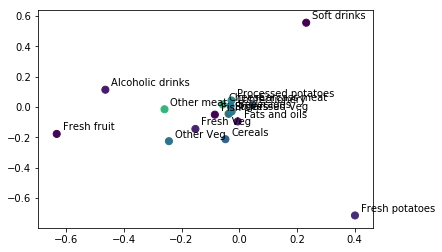

In [12]:
# Answer
C = X.T.dot(X)
ev, V = np.linalg.eigh(C)
U = np.fliplr(V[:, -2:])

scatter(U, food)

**Answer**

We observe that there is a central group of variables around the middle of each principal component, with four variables on the periphery, that do not seem to be part of the
group.

Let us remind that in the PCA projection, England, Wales and Scotland were clustered together, while Northern Ireland was the country that was away from the cluster. Perhaps, there is some association to be made between the four variables that are away from the cluster in this figure and the country that is located away from the rest of the countries in the
PCA projection, Northern Ireland. 

A look at the original data reveals that for Fresh potatoes, Alcoholic drinks and Fresh fruit, there is a noticeable difference between the values for England, Wales and Scotland, which are roughly similar, and Northern Ireland, which is usually significantly higher or lower.

>Recover the result with scikit-learn.

In [ ]:
# Answer
scatter(pca.components_.T, food)

# Kernel principal component analysis <a id="part2"></a>


In [5]:
from sklearn.decomposition import KernelPCA

class PreKernelPCA(object):
    def __init__(self, kernel=None, *args, **kwargs):
        """
            Adapter for kernel PCA with precomputed kernel.
        
            Input:
                kernel: kernel function
                all arguments of KernelPCA
        """
        self.kernel_fun = kernel
        self.kernelpca = KernelPCA(kernel='precomputed', *args, **kwargs)
        
    def __getattr__(self, item):
        return getattr(self.kernelpca, item)
    
    def fit(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        self.data = data.copy()
        return self.kernelpca.fit(self.kernel_fun(data, data))
    
    def fit_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        self.data = data.copy()
        return self.kernelpca.fit_transform(self.kernel_fun(data, data))
    
    def transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        return self.kernelpca.transform(self.kernel_fun(data, self.data))

## An illustrative example <a id="part2sec1"></a>


>Apply a 2-principal components analysis to the following dataset.
Plot the transformed data and the level sets of the reduction method in the original space.

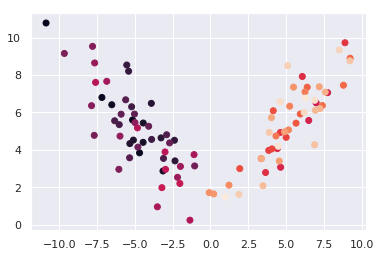

In [6]:
# Dataset
X = np.r_[gaussian_sample([-5, 5], sigma1=10, theta=-np.pi/4),
          gaussian_sample([5, 5], sigma1=10, theta=np.pi/4)]
scatter(X)

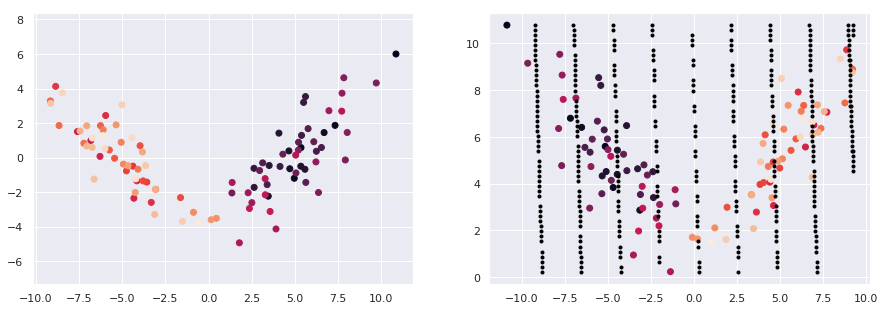

In [7]:
# Answer
from sklearn.decomposition import PCA

def pcaplot(red, data, component=0):
    Z = red.fit_transform(data)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    scatter(Z)
    plt.axis('equal')
    
    plt.subplot(1, 2, 2)
    scatter(data)
    plot_level_set(red, data, component=component)

pca = PCA(n_components=2)
pcaplot(pca, X)

>Define the kernel associated to the feature map $\phi \colon x \in \mathbb R^2 \mapsto (x_1, \|x\|_2) \in \mathbb R^2$.
Apply a principal component analysis with this kernel and produce the same plots as before.

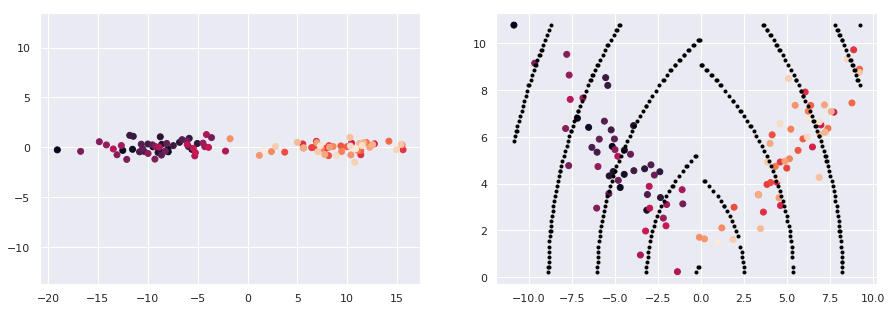

In [8]:
# Answer
phi = lambda x: np.c_[x[:, 0], np.sign(x[:, 0]) * np.linalg.norm(x, axis=1)]
kernel = lambda x, y: phi(x) @ phi(y).T
    
kpca = PreKernelPCA(n_components=2, kernel=kernel)
pcaplot(kpca, X)

>Display the level set of the second component. How can you interpret the fact that the transformed data is mainly distributed along the first axis?

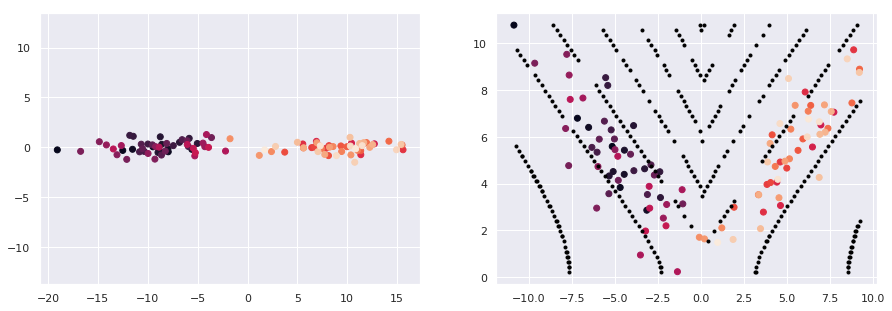

In [10]:
# Answer
pcaplot(kpca, X, component=1)

## The preimage problem <a id="part2sec2"></a>
>We now consider the problem of reconstructing data from its projection.
To state the problem formally, let $\phi : \mathbb R^d \to \mathbb R^D$ be a mapping function.
Kernel PCA maps a point $x \in \mathbb R^d$ to $\phi(x)$, then projects the result in $\mathbb R^p$ by computing $z = V^\top \phi(x)$, with $V \in \mathbb R^{D \times p}$.
If the kernel is linear, $\phi$ is the identity function and it is known that the linear inverse mapping that minimizes the reconstruction error is $Vz = VV^\top \phi(x) = VV^\top x \in \mathbb R^D$.

>However, if the kernel is not linear, inverting the PCA transform boils down to finding $\tilde x \in \mathbb R^d$ such that $\tilde x \in \operatorname{arg\,min}_{x' \in \mathbb R^d} \|\phi(x') - Vz\|$, which is not an easy task because of the nonlinear mapping function $\phi$.

>A way to solve this problem is to regress the original data $x$ on its projection $z$, for instance with ordinary linear regression.
In other words, we have to find a (linear) function $\psi : \mathbb R^p \to \mathbb R^d$ such that $x \approx \psi(z) = \psi(V^\top \phi(x))$.
Again, for linear PCA, this inverse mapping is no more than $\psi(z) = Vz$ and the reconstruction error is $\|x - \psi(V^\top x)\| = \|x - VV^\top x\|$.

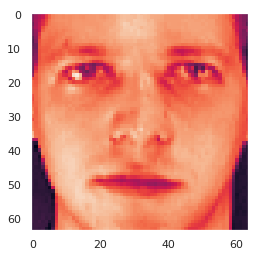

In [11]:
# Dataset
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces('./data/').data

plt.imshow(faces[0, :].reshape(64, -1))
plt.axis('image')
plt.grid(False)

>Perform a linear 10-principal component analysis and compute the reconstruction error.

In [12]:
# Answer
def red_err(red, data):
    proj = red.fit_transform(data)
    invdata = red.inverse_transform(proj)
    err = np.linalg.norm(data - invdata)
    return err, invdata

n_components = 10
pca = PCA(n_components=n_components)
pca_err, invfaces = red_err(pca, faces)
print('Reconstruction error for PCA:', pca_err)

Reconstruction error for PCA: 104.15682


>Show the reconstruction of the first image.

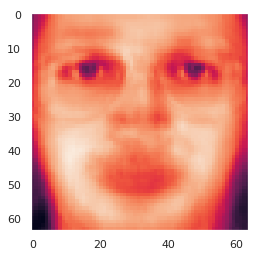

In [13]:
# Answer
plt.imshow(invfaces[0, :].reshape(64, -1))
plt.axis('image')
plt.grid(False)

>Implement the proposed solution (ordinary linear regression) to the preimage problem in the following class.

In [14]:
class PreImKernelPCA(object):
    def __init__(self, fit_inverse_transform=None, *args, **kwargs):
        """
            Adapter for kernel PCA with linear preimage.
        
            Input:
                all arguments of KernelPCA
        """
        pass
        
    def __getattr__(self, item):
        return getattr(self.kernelpca, item)
    
    def fit(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        pass
    
    def fit_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        pass
    
    def inverse_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        pass

In [15]:
# Answer
from sklearn.linear_model import LinearRegression

class PreImKernelPCA(object):
    def __init__(self, fit_inverse_transform=None, *args, **kwargs):
        """
            Adapter for kernel PCA with linear preimage.
        
            Input:
                all arguments of KernelPCA
        """
        self.kernelpca = KernelPCA(fit_inverse_transform=False, *args, **kwargs)
        
    def __getattr__(self, item):
        return getattr(self.kernelpca, item)
    
    def fit(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        proj = self.kernelpca.fit_transform(data)
        self.reg = LinearRegression().fit(proj, data)
        return self
    
    def fit_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        proj = self.kernelpca.fit_transform(data)
        self.reg = LinearRegression().fit(proj, data)
        return proj
    
    def inverse_transform(self, data):
        """
            Input:
                data: data matrix (number of individuals x dimension)
        """
        return self.reg.predict(data)

>Compare kernel PCA (with a Gaussian kernel) and PCA based on the reconstruction error and the visualization of the first image reconstruction.

Reconstruction error for PCA: 104.16876


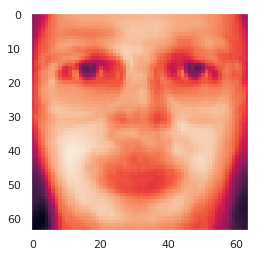

In [16]:
# Answer
kpca = PreImKernelPCA(n_components=n_components, kernel='rbf')
kpca_err, invfaces = red_err(kpca, faces)
print('Reconstruction error for kernel-PCA:', kpca_err)

plt.imshow(invfaces[0, :].reshape(64, -1))
plt.axis('image')
plt.grid(False)

>Does tuning the parameter $\gamma$ help in improving the reconstruction error?

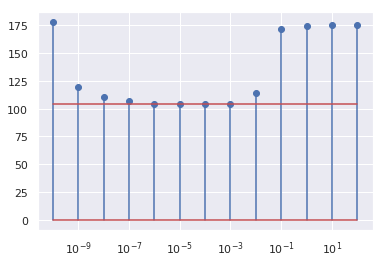

In [17]:
# Answer
kpca = PreImKernelPCA(n_components=n_components, kernel='rbf')

err = []
gammas = np.logspace(-10, 2, 13)

for gamma in gammas:
    kpca.set_params(gamma=gamma)
    err.append(red_err(kpca, faces)[0])
    
plt.stem(gammas, err)
plt.plot([gammas.min(), gammas.max()], [pca_err]*2, 'r')
plt.xscale('log')

>How is the preimage problem solved in kernel PCA as implemented in `scikit-learn`?

**Answer**

The documentation and the source of `scikit-learn` indicate that the preimage problem is solved by kernel ridge regression with default regularization parameter $\alpha=1$.

    def _fit_inverse_transform(self, X_transformed, X):
        if hasattr(X, "tocsr"):
            raise NotImplementedError("Inverse transform not implemented for "
                                      "sparse matrices!")

        n_samples = X_transformed.shape[0]
        K = self._get_kernel(X_transformed)
        K.flat[::n_samples + 1] += self.alpha
        self.dual_coef_ = linalg.solve(K, X, sym_pos=True, overwrite_a=True)
        self.X_transformed_fit_ = X_transformed

# Manifold learning <a id="part3"></a>
>Draw a sample of 1000 points from the [swiss roll dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) and scatter it in 3D.

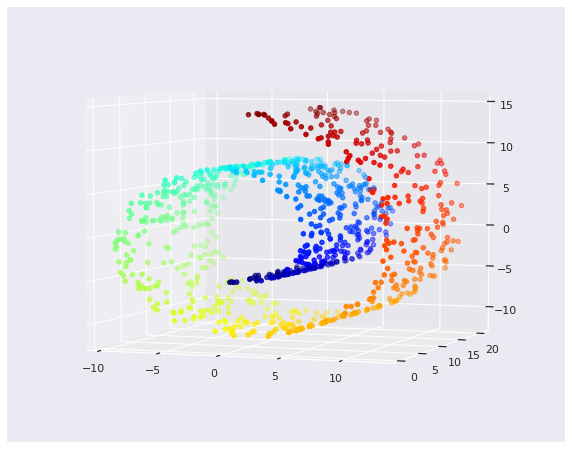

In [84]:
# Answer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

# Dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.)
colormap = dict(c=t, cmap='jet')

# Initialize 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(5, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], **colormap)

>Compare [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), [MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS), [ISOMAP](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap) and [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) as dimension reduction method from 3D to 2D and scatter the new representation of the data in each case.

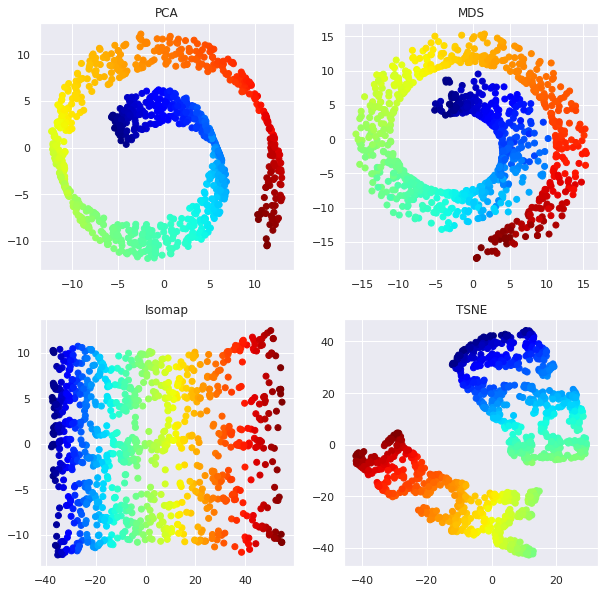

In [87]:
# Answer
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE

fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)
for ax, method in zip(axes.flat, [PCA(),
                                  MDS(max_iter=100),
                                  Isomap(n_neighbors=10),
                                  TSNE()]):
    method.set_params(n_components=2)
    Xred = method.fit_transform(X)
    ax.scatter(Xred[:, 0], Xred[:, 1], **colormap)
    ax.set_title(method.__class__.__name__)

>Use [kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) with a Gaussian kernel and several values of $\gamma$ to perform dimension reductions.
Scatter the new representation of the data in each case.
Is it satisfactory?

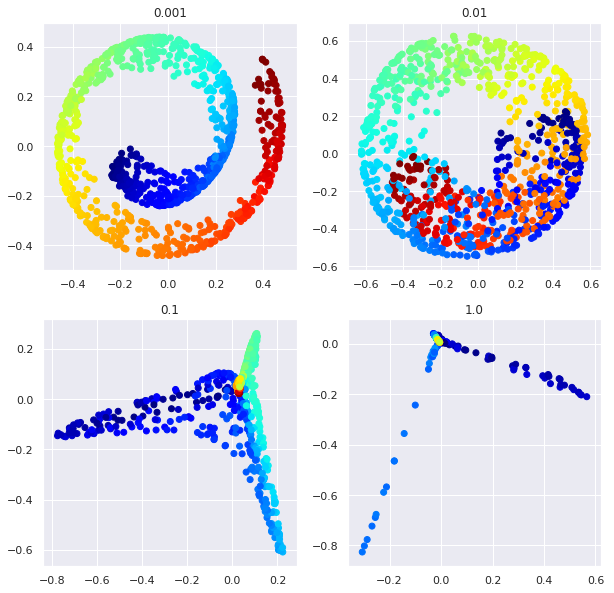

In [146]:
# Answer
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import KernelPCA as KPCA

fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)
for ax, gamma in zip(axes.flat, np.logspace(-3, 0, num=4)):
    method = KPCA(n_components=2, kernel="rbf", gamma=gamma)
    Xred = method.fit_transform(X)
    ax.scatter(Xred[:, 0], Xred[:, 1], **colormap)
    ax.set_title(str(gamma))